## Imports and Dataframe Attributes

In [4]:
#Import to process file
import pandas as pd
import csv
import os

#File directory
file_directory = "Raw Data/3_8_18 Bruno/"
file_list = os.listdir(file_directory)

#Read file 
file = pd.read_csv(file_directory + file_list[1], header = None, sep = ';', names = ['timestamp','x','y','z'], parse_dates = ['timestamp'])
file.head()

,timestamp,x,y,z
0,2018-03-14 20:27:05,0.004638,-1.060791,-0.159668
1,2018-03-14 20:27:05,0.004638,-1.060791,-0.159668
2,2018-03-14 20:27:05,-0.017333,-0.990722,-0.168945
3,2018-03-14 20:27:05,-0.015136,-0.992188,-0.172852
4,2018-03-14 20:27:05,-0.017089,-0.993896,-0.172363


In [5]:
#Row x columns
file.shape

(36531, 4)

In [6]:
#Elapsed time for sample session
file['timestamp'].iloc[-1] - file['timestamp'].iloc[0]

Timedelta('0 days 00:12:11')

## Raw Data

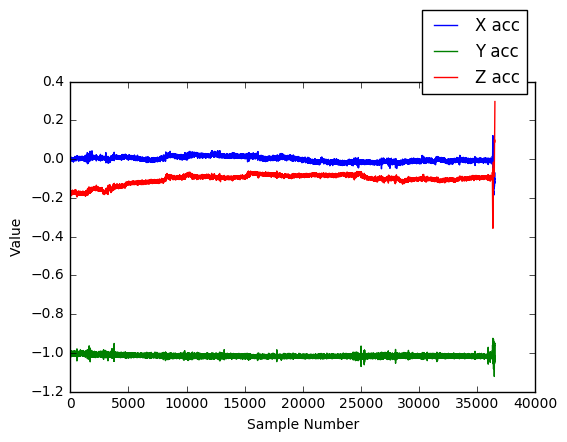

In [7]:
#Plot the raw data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x, = plt.plot(file['x'], label='X acc')
y, = plt.plot(file['y'], label='Y acc')
z, = plt.plot(file['z'], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

## Truncate Data

In [8]:
#Truncate last 500 samples due to noise 
file = file[:-500]

#Truncate first 100 samples due to noise
file = file[100:]

In [9]:
#Make sure truncate worked
file.shape

(35931, 4)

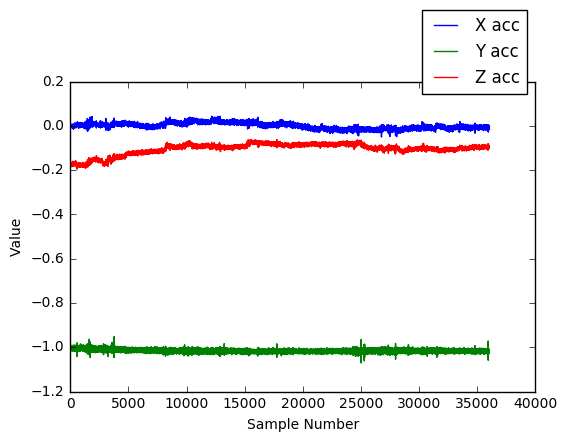

In [10]:
#Plot truncated data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x, = plt.plot(file['x'], label='X acc')
y, = plt.plot(file['y'], label='Y acc')
z, = plt.plot(file['z'], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

In [11]:
#Time dataframe
time = file['timestamp']

#Positional datafram
position = file.drop(['timestamp'], axis = 1)

## Normalized Data

In [13]:
#Normalize data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Store normalized data in new variable
position = scaler.fit_transform(position)

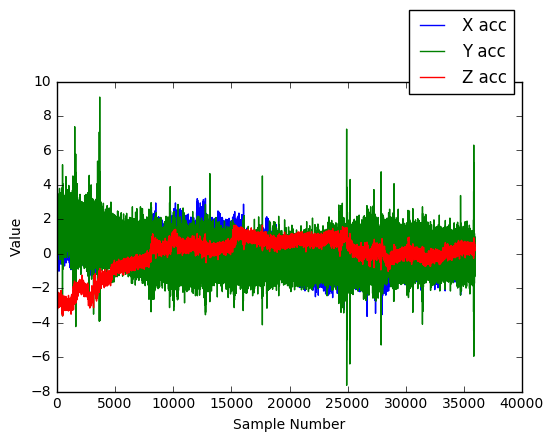

In [14]:
#Plot normalized data
x, = plt.plot(position[:,0], label='X acc')
y, = plt.plot(position[:,1], label='Y acc')
z, = plt.plot(position[:,2], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

## Rolling Mean Functions and Graphs

In [15]:
"""
This method will compute a rolling mean and apply it to the array
through division
"""
def rolling_mean_div(arr, window):
    
    mean_arr = []
    arr_len = arr.shape[0]
    n_windows = int(arr_len/window)
    
    for win in range(arr_len):
        start = win
        end = start + window
        mean = mean_arr.append(np.mean(arr[start:end]))
        
    new_arr = arr/mean_arr
    
    return new_arr


In [16]:
"""
This method will compute a rolling mean and apply it to the array
through subtraction
"""
def rolling_mean_sub(arr, window):
    
    mean_arr = []
    arr_len = arr.shape[0]
    n_windows = int(arr_len/window)
    
    for win in range(arr_len):
        start = win
        end = start + window
        mean = mean_arr.append(np.mean(arr[start:end]))
        
    new_arr = arr-mean_arr
    
    return new_arr

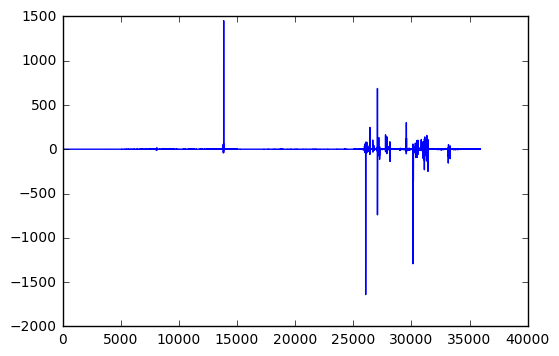

In [66]:
#Plot X position array with window size 35
x = rolling_mean_div(position[:,2], 35)
plt.plot(x)
plt.show()

#Obviously some outliers are making the graph hard to read

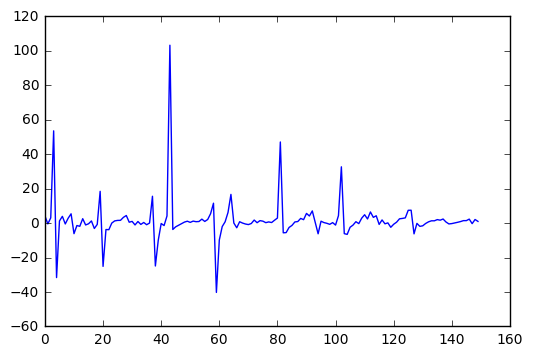

In [56]:
#Plot X position array first 150 samples with window size 10
x = rolling_mean_div(position[:150,0], 10)
plt.plot(x)
plt.show()

#Will need to iterate with window size - this looks like a heartbeat 

### Note

75 BPM <br>
50 samples/second

Normal heart rate is 60 - 100 BPM which means 1 - 1.7 beats/second <br>
So - we should be able to see one beat every 50 - 85 frames 

The plot below is only 15 frames..

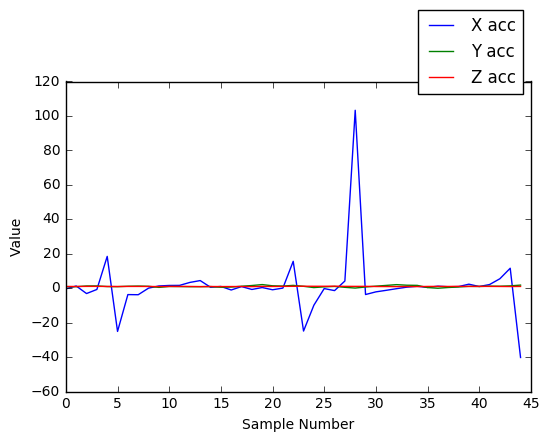

In [57]:
#Plot X position array 15-60 samples with window size 10
x_position = rolling_mean_div(position[:,0], 10)

y_position = rolling_mean_div(position[:,1], 10)

z_position = rolling_mean_div(position[:,2], 10)

x, = plt.plot(x_position[15:60], label='X acc')
y, = plt.plot(y_position[15:60], label='Y acc')
z, = plt.plot(z_position[15:60], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

## Filters

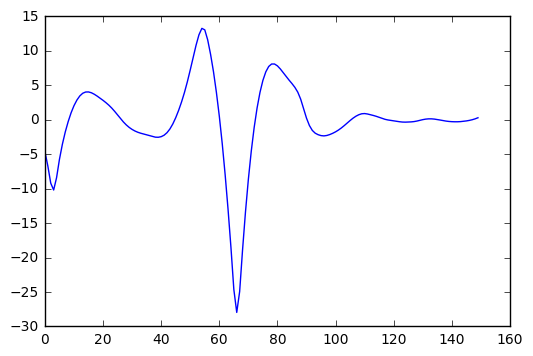

In [62]:
#Buterworth filter
from scipy import signal

#Apply to x axis data points 
x_position = rolling_mean_div(position[:,0], 10)

# First, design the Buterworth filter
N  = 1 # Filter order
Wn = [0.04, 0.11] # Cutoff frequency
B, A = signal.butter(N, Wn, btype = 'bandpass' , output='ba')
 
# Second, apply the filter
x_filter = signal.filtfilt(B,A, x_position)

plt.plot(x_filter[350:500])
plt.show()

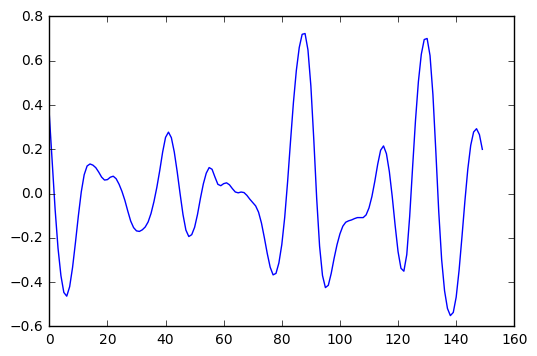

In [64]:
#Buterworth filter
from scipy import signal

#Apply to y axis data points 
y_position = rolling_mean_div(position[:,1], 10)

# First, design the Buterworth filter
N  = 1 # Filter order
Wn = [0.04, 0.11] # Cutoff frequency
B, A = signal.butter(N, Wn, btype = 'bandpass' , output='ba')
 
# Second, apply the filter
y_filter = signal.filtfilt(B,A, y_position)

#Plot 
plt.plot(y_filter[350:500])
plt.show()

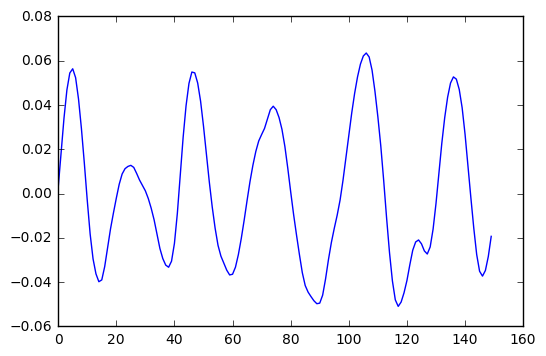

In [55]:
#Buterworth filter
from scipy import signal

#Apply to z axis data points
z_position = rolling_mean_div(position[:,2], 10)

# First, design the Buterworth filter
N  = 1 # Filter order
Wn = [0.04, 0.11] # Cutoff frequency
B, A = signal.butter(N, Wn, btype = 'bandpass' , output='ba')
 
# Second, apply the filter
z_filter = signal.filtfilt(B,A, z_position)

#Plot
plt.plot(z_filter[350:500])
plt.show()

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


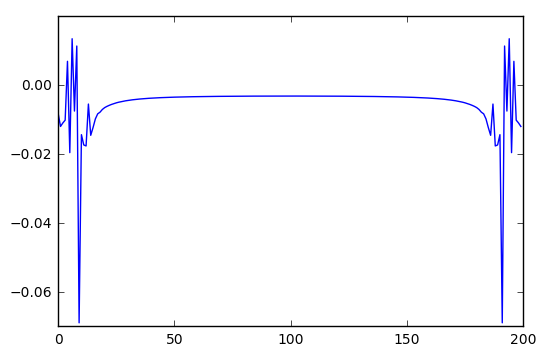

In [37]:
#Fourier transform
from scipy import signal

#Apply to y axis 
y_position = rolling_mean_sub(position[:1000,1], 10)

# First, design the Buterworth filter
N  = 4 # Filter order
Wn = 0.09 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
y_position = signal.filtfilt(B,A, y_position)

#Apply FFT 
plt.plot(np.fft.ifft(y_position[0:200]))
plt.show()

## Feature Extraction Functions

In [25]:
"""
Returns max value in array
"""
def max_peak_loc(arr):
    return max(arr)


"""
Returns previous max peak value
"""
def previous_max_peak(arr):

    #Gets index of max value
    max_index = np.argmax(arr)
    
    #Creates new array 
    new_arr = arr[0:max_index+1]
    
    #Gets top 5 indexes for next max value
    top_five = new_arr.argsort()[-5:][::-1]
    
    top_five = 
    
    #Ensures getting the previous max value
    index_peak = top_five[(max_index - top_five).argmin()]
    
    return index_peak


"""
Returns previous min peak value
"""
def previous_min_peak(arr):

    #Gets index of max value
    max_index = np.argmax(arr)
    
    #Creates new array 
    new_arr = arr[0:max_index]
    
    #Gets top 5 indexes for next min value
    top_five = new_arr.argsort()[-5:][::-1]
    
    #Ensures getting the previous max value
    index_peak = top_five[(max_index - top_five).argmin()]
    
    return index_peak

SyntaxError: invalid syntax (<ipython-input-25-260e8145398f>, line 22)

In [ ]:
x = x_position[50:100]
print(max(x_position[50:100]))
print(np.argmax((x_position[50:100])))
x_position[50:100][33]

In [ ]:
max_peak_loc(x_position[50:100])
print(previous_max_peak(x_position[50:100]))
np.argmax(x_position[50:100][0:33])
print(x[8], x[31])

In [ ]:
print((x_position[50:100].argsort()[-5:][::-1]).argmin())

In [ ]:
y = 34 - x_position[50:100].argsort()[-5:][::-1]

print(y)
print((y[y <0]))


In [ ]:
print(x_position[50:100][31])